## Load Glass Dataset


In [1]:
import pandas as pd

df = pd.read_excel('/content/glass.xlsx')
df.head()

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum


In [2]:
print(df.columns)
print(df.shape)
df.head(10)

Index(['Prepare a model for glass classification using Random Forest'], dtype='object')
(19, 1)


,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [3]:
df = pd.read_excel('/content/glass.xlsx', header=None)
df.head(15)

,0
0,Prepare a model for glass classification using...
1,Data Description:
2,RI : refractive index
3,Na: Sodium (unit measurement: weight percent i...
4,Mg: Magnesium
5,AI: Aluminum
6,Si: Silicon
7,K:Potassium
8,Ca: Calcium
9,Ba: Barium


In [4]:
excel_file = pd.ExcelFile('/content/glass.xlsx')
print(excel_file.sheet_names)

['Description', 'glass']


In [5]:
df = pd.read_excel('/content/glass.xlsx', sheet_name='glass')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Exploratory Data Analysis (EDA)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [9]:
df['Type'].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


## Data Visualization

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries matplotlib.pyplot and seaborn imported successfully.")

Libraries matplotlib.pyplot and seaborn imported successfully.


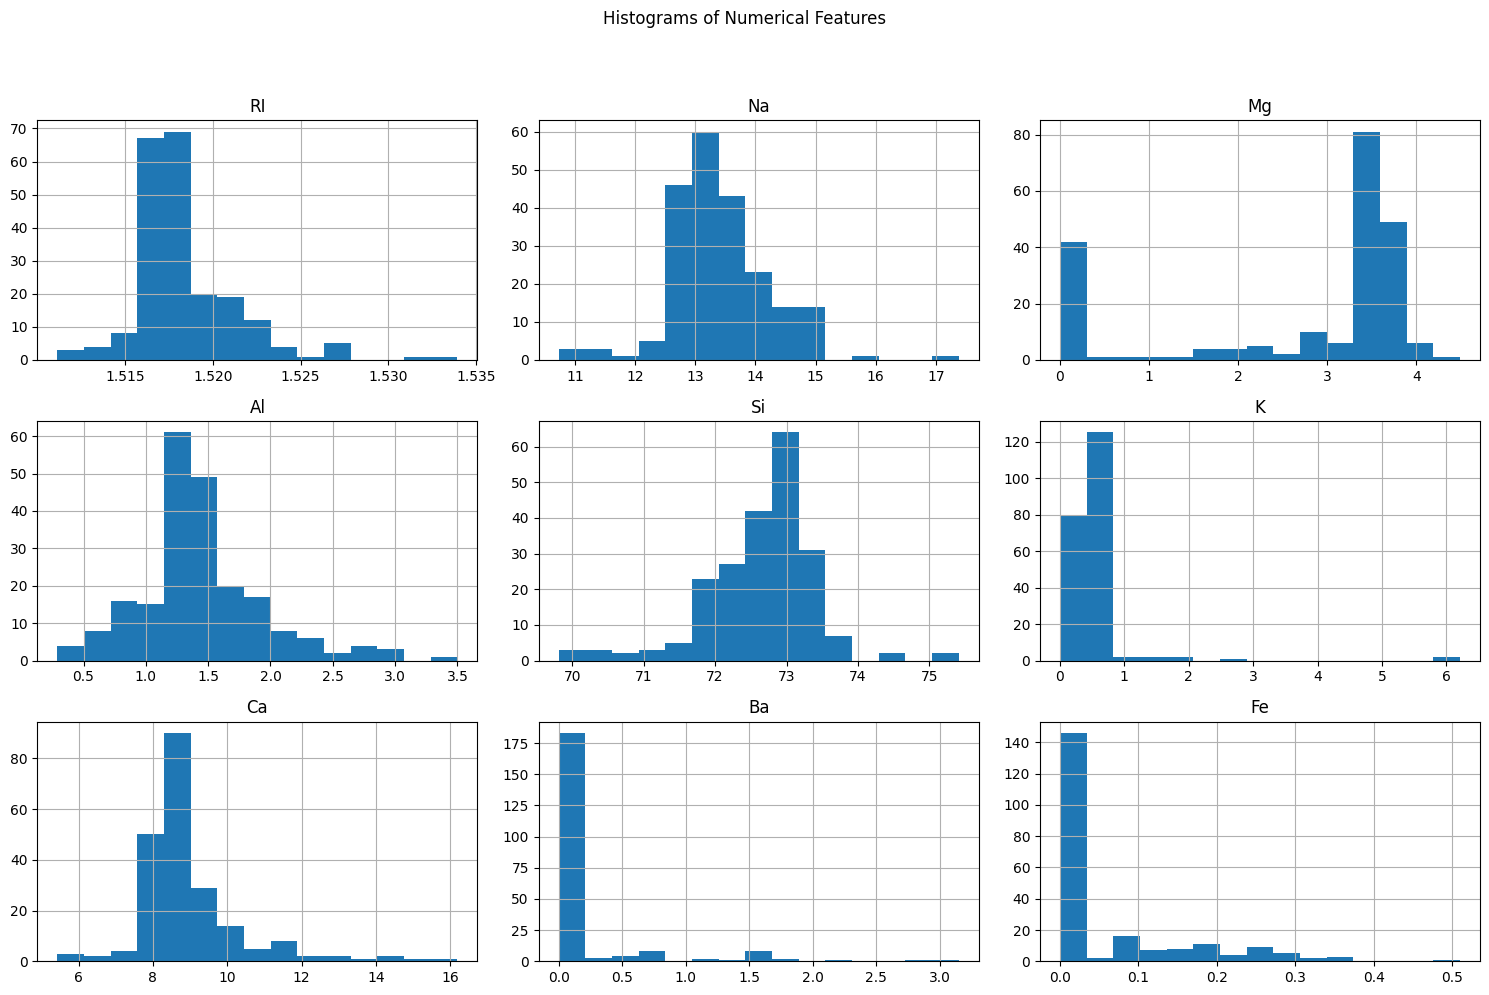

In [11]:
df.drop('Type', axis=1).hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()


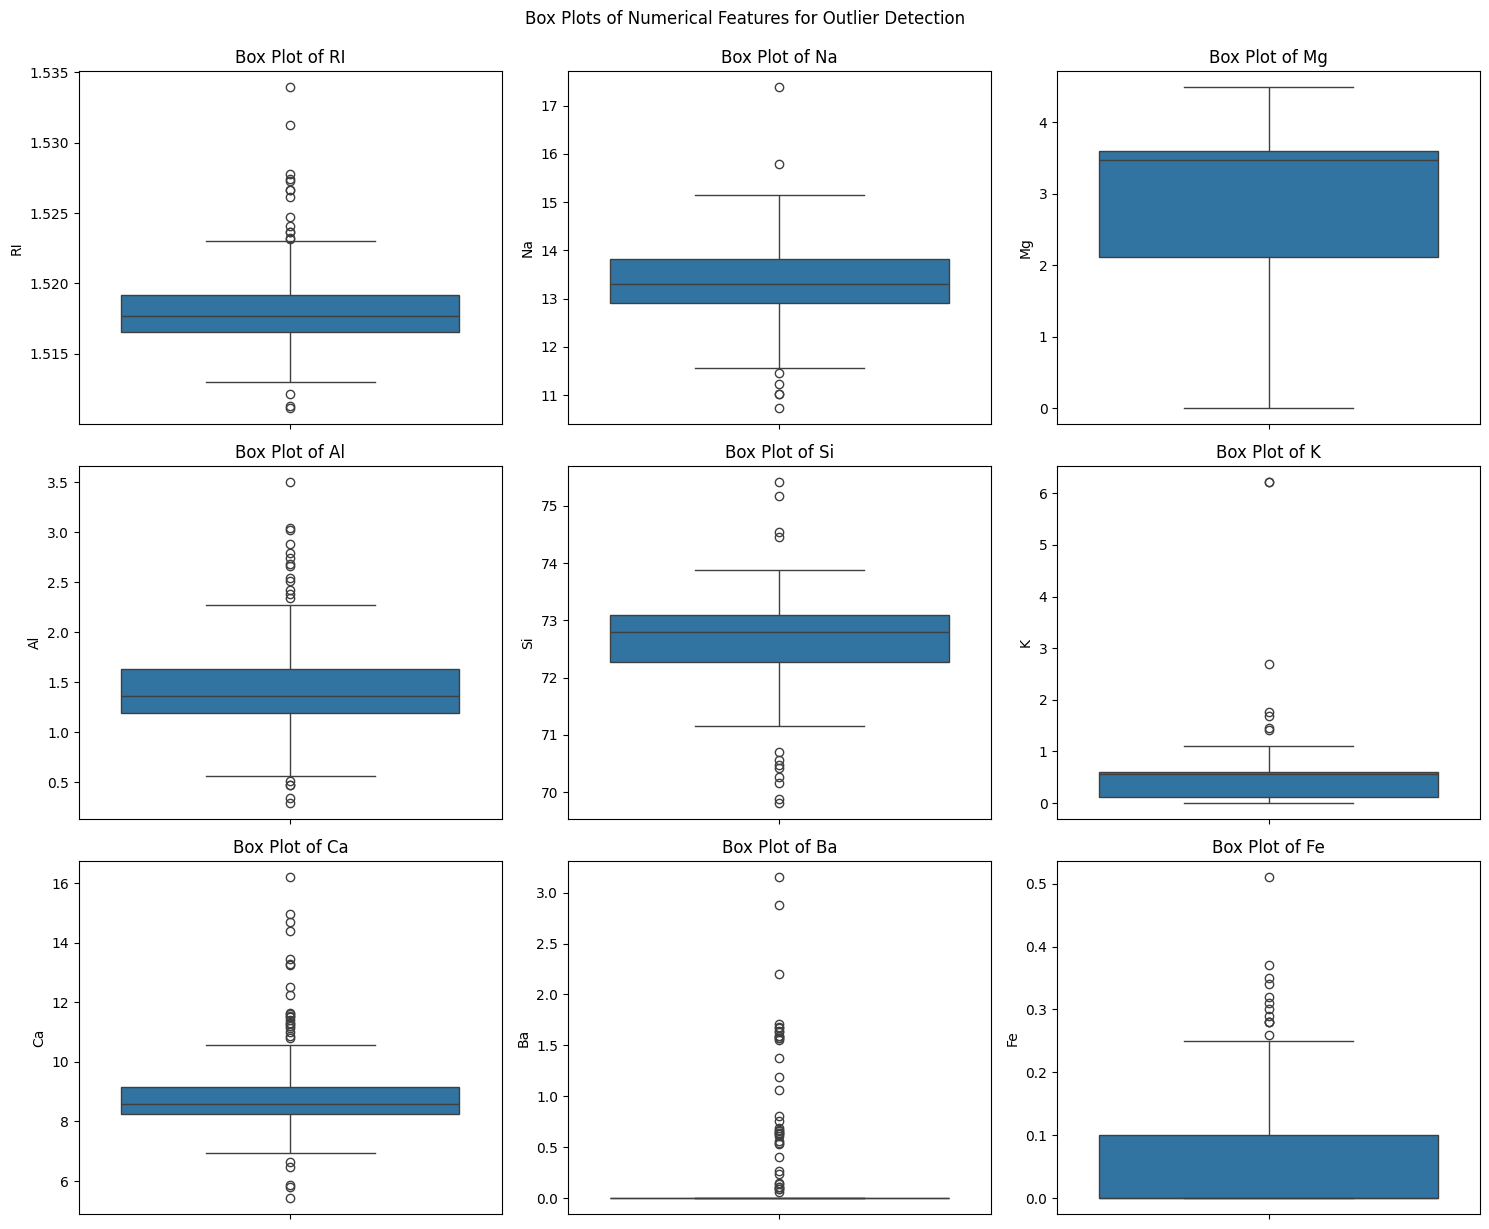

In [12]:
num_features = df.drop('Type', axis=1).columns
plt.figure(figsize=(15, 12))
for i, feature in enumerate(num_features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed, e.g., 3 rows, 3 columns
    sns.boxplot(y=df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.ylabel(feature)
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features for Outlier Detection', y=1.02)
plt.show()

In [13]:
correlation_matrix = df.drop('Type', axis=1).corr()
print("Correlation Matrix successfully computed.")

Correlation Matrix successfully computed.


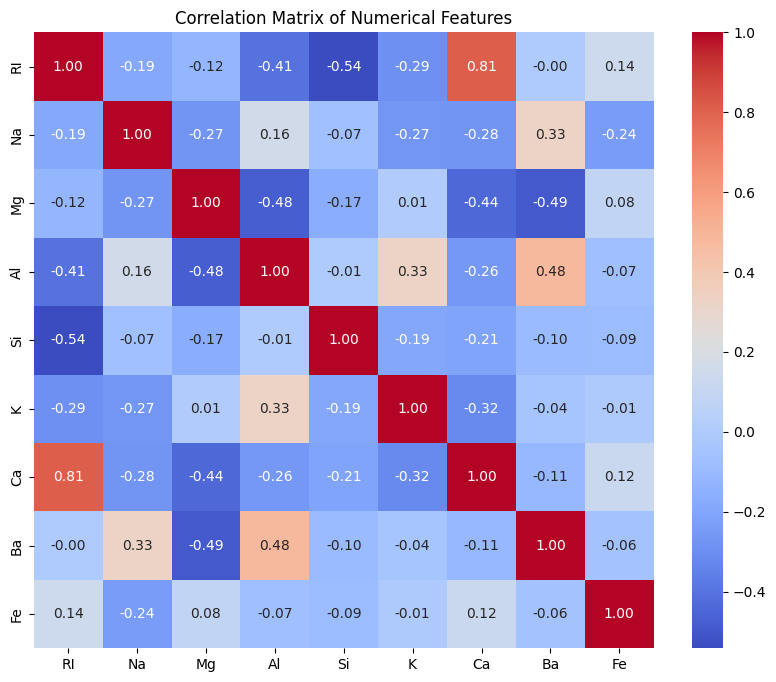

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Data Preprocessing - Missing Values

Check for and handle missing values in the dataset, implementing a chosen strategy (e.g., imputation or removal) and explaining the reasoning.


#### Handling Missing Values (No Action Required)

During the Exploratory Data Analysis (EDA) phase, checked for missing values using `df.isnull().sum()`. The output confirmed that all columns have 0 missing values. Therefore, no further action for handling missing data, such as imputation or removal, is required at this stage.

## Data Preprocessing - Categorical Variables

Identify and apply appropriate encoding techniques (like one-hot encoding) to convert any categorical variables into a numerical format.


Based on the exploratory data analysis, all features in the DataFrame `df` are already numerical (float64 or int64). The 'Type' column, while representing different glass types, is already encoded as integer values (1, 2, 3, 5, 6, 7). Therefore, no specific encoding steps are required for categorical variables, as they are already in a numerical format suitable for modeling.

## Data Preprocessing - Feature Scaling and Imbalance Handling

Apply feature scaling techniques (standardization or normalization) to ensure features are on a similar scale. Address data imbalance, if present, and explain the strategy used.


In [15]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

print("StandardScaler and SMOTE imported successfully.")

StandardScaler and SMOTE imported successfully.


In [16]:
X = df.drop('Type', axis=1)
y = df['Type']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("Features scaled and resampled successfully.")
print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

Features scaled and resampled successfully.
Original dataset shape: (214, 9), (214,)
Resampled dataset shape: (456, 9), (456,)
Class distribution after SMOTE:
Type
1    76
2    76
3    76
5    76
6    76
7    76
Name: count, dtype: int64


## Split Data

Divide the preprocessed data into training and testing sets for model development and evaluation.


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets successfully.
X_train shape: (364, 9)
X_test shape: (92, 9)
y_train shape: (364,)
y_test shape: (92,)


## Random Forest Model Implementation



In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("RandomForestClassifier and evaluation metrics imported successfully.")

RandomForestClassifier and evaluation metrics imported successfully.


In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")

Random Forest Model Performance:
Accuracy: 0.9239
Precision: 0.9263
Recall: 0.9239
F1-Score: 0.9234


## Explain Bagging and Boosting

### Subtask:
Provide a detailed explanation of Bagging and Boosting methods, highlighting their differences and how they work.

### Explanation of Bagging and Boosting

#### 1. Explain Bagging (Bootstrap Aggregating)

**Bagging**, short for Bootstrap Aggregating, is an ensemble learning technique designed to improve the stability and accuracy of machine learning algorithms by reducing variance, particularly in high-variance, low-bias models like decision trees. It works by training multiple models on different subsets of the training data and then averaging their predictions.

**How it works:**

*   **Bootstrap Sampling:** Bagging starts by creating *M* new training datasets from the original dataset, each of the same size as the original. This is done through a process called **bootstrap sampling**, which involves random sampling with replacement. This means that each new dataset is a resampled version of the original, likely containing duplicate instances while omitting others.
*   **Parallel Model Training:** A separate base learner (e.g., a decision tree) is then trained independently and in parallel on each of these *M* bootstrap samples. Since each model sees a slightly different subset of the data, they will make different errors and capture different aspects of the underlying data distribution.
*   **Aggregation:** For regression tasks, the predictions from all individual models are averaged to produce the final output. For classification tasks, a majority vote is typically taken.

**Main Goal:** The primary goal of Bagging is to **reduce variance** in the predictions of complex models. By averaging out the predictions of many models trained on slightly different data, the impact of noise and outliers in any single training set is mitigated, leading to more robust and generalized models.

**Example:** The most prominent example of an algorithm that utilizes Bagging is **Random Forest**. Random Forest not only uses bagging but also introduces random feature selection at each split to further decorrelate the trees, enhancing its variance reduction capabilities.

#### 2. Explain Boosting

**Boosting** is another powerful ensemble learning technique that sequentially builds an ensemble of models, where each new model attempts to correct the errors of the previous ones. It is primarily focused on reducing bias and converting weak learners into strong learners.

**How it works:**

*   **Sequential Model Training:** Boosting operates iteratively. It starts by training an initial base learner on the entire training dataset. Subsequent base learners are then trained in a sequence, with each new model focusing on the instances that were misclassified or poorly predicted by the previous models.
*   **Weighting of Misclassified Samples:** In many boosting algorithms (like AdaBoost), misclassified samples from the previous iteration are assigned higher weights, making them more important for the next base learner to correctly classify. Correctly classified samples receive lower weights.
*   **Iterative Improvement:** The process continues for a predefined number of iterations or until a certain performance threshold is met. Each new model adds to the ensemble, gradually improving the overall predictive power by addressing the weaknesses of its predecessors.
*   **Aggregation:** The final prediction is typically a weighted sum of the predictions from all individual learners, where models that perform better or are trained later in the sequence might have higher influence.

**Main Goal:** The main goal of Boosting is to **reduce bias** by iteratively focusing on hard-to-classify examples, thereby creating a strong learner from a series of weak learners.

**Examples:** Popular boosting algorithms include **AdaBoost (Adaptive Boosting)**, which adjusts sample weights, and **Gradient Boosting**, which builds models by minimizing a loss function in a gradient descent-like manner. **XGBoost**, **LightGBM**, and **CatBoost** are advanced implementations of Gradient Boosting.

#### 3. Compare and Contrast Bagging and Boosting

Here are the key differences between Bagging and Boosting:

*   **Training Process:**
    *   **Bagging:** Models are trained **in parallel** and independently on bootstrap samples.
    *   **Boosting:** Models are trained **sequentially**, where each subsequent model tries to correct the errors of the previous one.
*   **Focus:**
    *   **Bagging:** Primarily aims to **reduce variance**.
    *   **Boosting:** Primarily aims to **reduce bias**.
*   **Model Dependence:**
    *   **Bagging:** Individual models are **independent** of each other.
    *   **Boosting:** Individual models are **dependent** on previous models in the sequence.
*   **Weighting:**
    *   **Bagging:** Typically, all samples have **equal weighting** for each base learner (or no specific weighting based on performance of previous models). Each bootstrap sample itself provides implicit weighting by the frequency of samples.
    *   **Boosting:** Samples are **re-weighted** (or residual errors are focused on) in each iteration, giving more importance to misclassified or difficult instances.
*   **Overall Goal:**
    *   **Bagging:** Improves accuracy through **diversity** and reduction of overfitting by averaging/voting predictions from diverse models.
    *   **Boosting:** Improves accuracy through **correction** of errors from previous models, turning weak learners into strong ones.

#### 4. Summarize the core idea behind each ensemble method

*   **Bagging (e.g., Random Forest):** The core idea of Bagging is to train **many independent models** on **random subsets of the data** and combine their predictions, primarily to **reduce variance** and improve generalization by making the final model less sensitive to the specific training data.

*   **Boosting (e.g., AdaBoost, Gradient Boosting):** The core idea of Boosting is to train **models sequentially**, where each new model learns from the **errors of its predecessors**, thereby iteratively **reducing bias** and creating a powerful ensemble from a collection of weak learners.

## Apply Bagging Method


In [20]:
from sklearn.ensemble import BaggingClassifier

print("BaggingClassifier imported successfully.")

BaggingClassifier imported successfully.


In [21]:
bagging_model = BaggingClassifier(random_state=42)
bagging_model.fit(X_train, y_train)

y_pred_bagging = bagging_model.predict(X_test)

accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Model Performance:")
print(f"Accuracy: {accuracy_bagging:.4f}")
print(f"Precision: {precision_bagging:.4f}")
print(f"Recall: {recall_bagging:.4f}")
print(f"F1-Score: {f1_bagging:.4f}")

Bagging Model Performance:
Accuracy: 0.9022
Precision: 0.9062
Recall: 0.9022
F1-Score: 0.9033


## Apply Boosting Method


In [22]:
from sklearn.ensemble import AdaBoostClassifier

print("AdaBoostClassifier imported successfully.")

AdaBoostClassifier imported successfully.


In [23]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted')
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted')
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted')

print(f"AdaBoost Model Performance:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1-Score: {f1_adaboost:.4f}")

AdaBoost Model Performance:
Accuracy: 0.5435
Precision: 0.4746
Recall: 0.5435
F1-Score: 0.4859


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
adaboost_model = AdaBoostClassifier(random_state=42)
adaboost_model.fit(X_train, y_train)

y_pred_adaboost = adaboost_model.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
precision_adaboost = precision_score(y_test, y_pred_adaboost, average='weighted', zero_division=0)
recall_adaboost = recall_score(y_test, y_pred_adaboost, average='weighted', zero_division=0)
f1_adaboost = f1_score(y_test, y_pred_adaboost, average='weighted', zero_division=0)

print(f"AdaBoost Model Performance:")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1-Score: {f1_adaboost:.4f}")

AdaBoost Model Performance:
Accuracy: 0.5435
Precision: 0.4746
Recall: 0.5435
F1-Score: 0.4859


## Compare Model Results

Compare the performance metrics of the Random Forest, Bagging, and Boosting models, discussing their strengths and weaknesses.


In [25]:
model_performance = {
    'Random Forest': {
        'Accuracy': accuracy_rf,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf
    },
    'Bagging': {
        'Accuracy': accuracy_bagging,
        'Precision': precision_bagging,
        'Recall': recall_bagging,
        'F1-Score': f1_bagging
    },
    'AdaBoost': {
        'Accuracy': accuracy_adaboost,
        'Precision': precision_adaboost,
        'Recall': recall_adaboost,
        'F1-Score': f1_adaboost
    }
}

performance_df = pd.DataFrame(model_performance).T
print("Model Performance Comparison:")
print(performance_df)

Model Performance Comparison:
               Accuracy  Precision    Recall  F1-Score
Random Forest  0.923913   0.926268  0.923913  0.923405
Bagging        0.902174   0.906175  0.902174  0.903251
AdaBoost       0.543478   0.474562  0.543478  0.485915
